In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import ascii

plt.style.use('ggplot')

In [2]:
CMB = ascii.read('COBE_CMB_data.txt')
x = np.array(CMB['frequency (Hz)'])
y = np.array(CMB['brightness (ergs/s/cm^2/sr/Hz)'])
CMB

frequency (Hz),brightness (ergs/s/cm^2/sr/Hz)
float64,float64
34473577711.372055,7.029471536390586e-16
42896956937.69582,1.0253178228238486e-15
51322332225.44733,1.3544045476166584e-15
60344529880.18272,1.6902073280174815e-15
68767909106.5062,2.0125779972022745e-15
77780126454.10146,2.3148004995630144e-15
85600695129.15724,2.6103069463157413e-15
94010101925.48483,2.8856652262444173e-15
102407532353.24394,3.120727172524994e-15


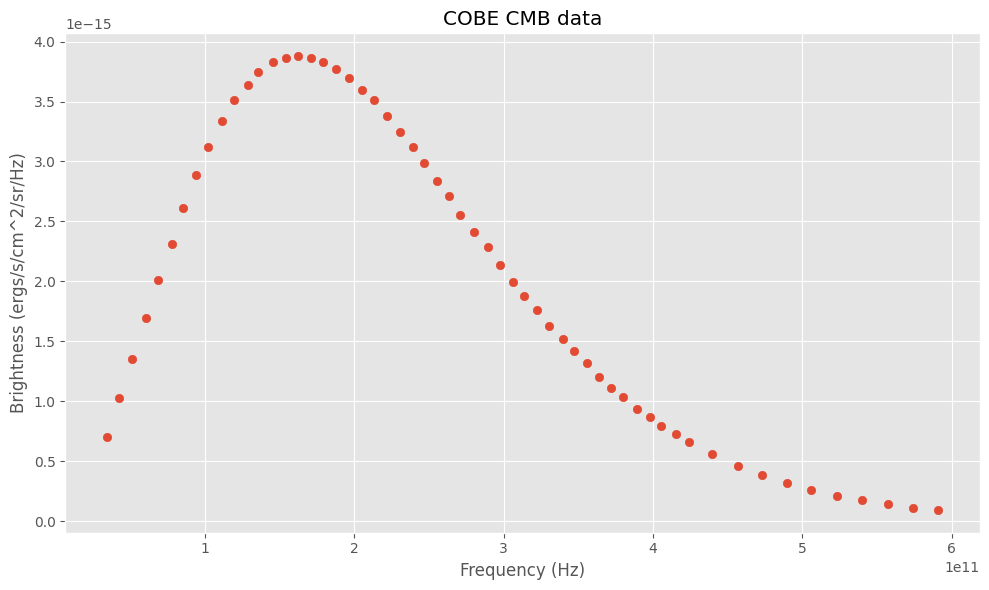

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(x,y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Brightness (ergs/s/cm^2/sr/Hz)')
plt.title('COBE CMB data')
plt.tight_layout()

In [4]:
from scipy.optimize import curve_fit
from astropy import constants as const

In [5]:
def black_body(x, T):
    # 2hv^3/c^2 * 1/(e^(hv/kT) - 1)
    h = 6.6261e-27 # erg s
    k = 1.3806e-16  # Boltzmann constant in erg/K
    c = 3e10        # Speed of light in cm/s
    
    B = (2 * h * x**3 / c**2)/((np.exp(h * x / (k * T)) - 1))
    return B

In [6]:
parameter = curve_fit(black_body, x, y)

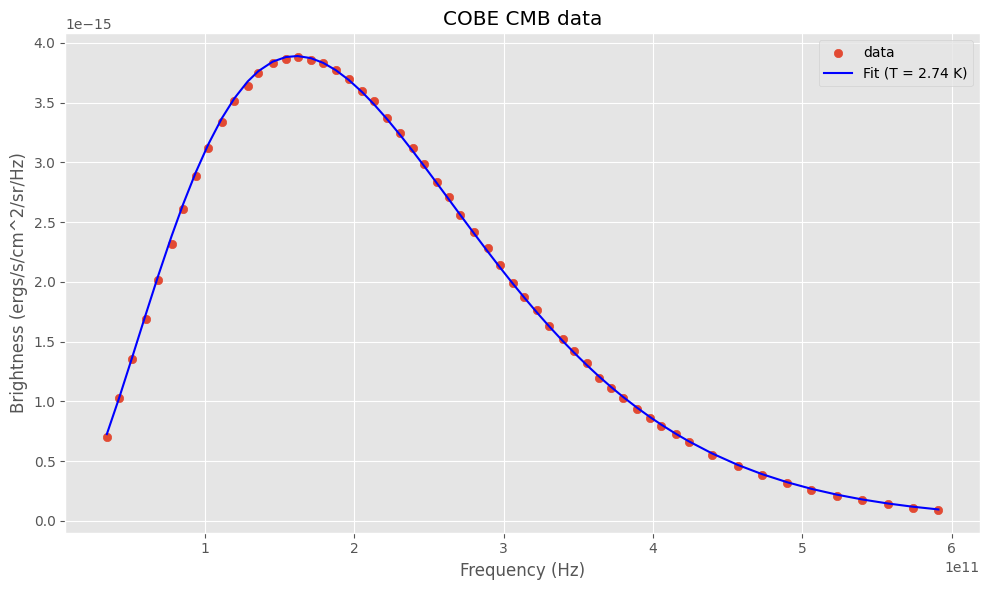

In [7]:
fit_y = black_body(x, parameter[0][0])
CMB_temp = parameter[0][0]
plt.figure(figsize=(10, 6))
plt.scatter(x,y, label = 'data')
plt.plot(x, fit_y, label=f'Fit (T = {CMB_temp:.2f} K)', color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Brightness (ergs/s/cm^2/sr/Hz)')
plt.title('COBE CMB data')
plt.legend()
plt.tight_layout()

In [8]:
print('CMB temperature:', CMB_temp, 'K')

CMB temperature: 2.7391291025488225 K


In [9]:
spectrum_1 = ascii.read('galaxy_21cm_spectrum/spectrum_d_0.69_kpc.txt')
spectrum_2 = ascii.read('galaxy_21cm_spectrum/spectrum_d_1.38_kpc.txt')
spectrum_3 = ascii.read('galaxy_21cm_spectrum/spectrum_d_2.06_kpc.txt')
spectrum_4 = ascii.read('galaxy_21cm_spectrum/spectrum_d_2.72_kpc.txt')
spectrum_5 = ascii.read('galaxy_21cm_spectrum/spectrum_d_3.35_kpc.txt')
spectrum_6 = ascii.read('galaxy_21cm_spectrum/spectrum_d_3.96_kpc.txt')
spectrum_7 = ascii.read('galaxy_21cm_spectrum/spectrum_d_4.54_kpc.txt')
spectrum_8 = ascii.read('galaxy_21cm_spectrum/spectrum_d_5.11_kpc.txt')
spectrum_9 = ascii.read('galaxy_21cm_spectrum/spectrum_d_5.62_kpc.txt')
spectrum_10 = ascii.read('galaxy_21cm_spectrum/spectrum_d_6.06_kpc.txt')
spectrum_11 = ascii.read('galaxy_21cm_spectrum/spectrum_d_6.5_kpc.txt')
spectrum_12 = ascii.read('galaxy_21cm_spectrum/spectrum_d_6.87_kpc.txt')

In [10]:
spectrum_list = [spectrum_1, spectrum_2, spectrum_3, spectrum_4, 
                 spectrum_5, spectrum_6, spectrum_7, spectrum_8, 
                 spectrum_9, spectrum_10, spectrum_11, spectrum_12]
dist = np.array([0.69, 1.38, 2.06, 2.72, 3.35, 3.96, 4.54, 5.11, 5.62, 6.06, 6.5, 6.87]) # array of distances of galaxy in kpc

In [11]:
def get_x_y(spectrum):
    x = np.array(spectrum['wavelngth (cm)'])
    y = np.array(spectrum['brightness'])
    return x, y

In [12]:
def Gauss(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

In [13]:
def plotter(x,y, ax, i, title):

    ax[i].scatter(x, y, label = 'data', s = 20)

    initial_guess = [1, np.mean(x), np.std(x)]
    popt, _ = curve_fit(Gauss, x, y, p0=initial_guess)
    # print(popt)
    x_fit = np.linspace(min(x), max(x), 1000)
    y_fit = Gauss(x_fit, *popt)

    ax[i].plot(x_fit, y_fit, label='Fit', color = 'blue')

    ax[i].set_xlabel('Wavelength (cm)')
    ax[i].set_ylabel('Brightness')
    ax[i].set_title(title)
    wv = popt[1]
    ax[i].axvline(x = wv, color = 'black', linestyle = '--', label = f'{wv} cm')
    # plt.tight_layout()
    ax[i].legend(loc = "upper left")

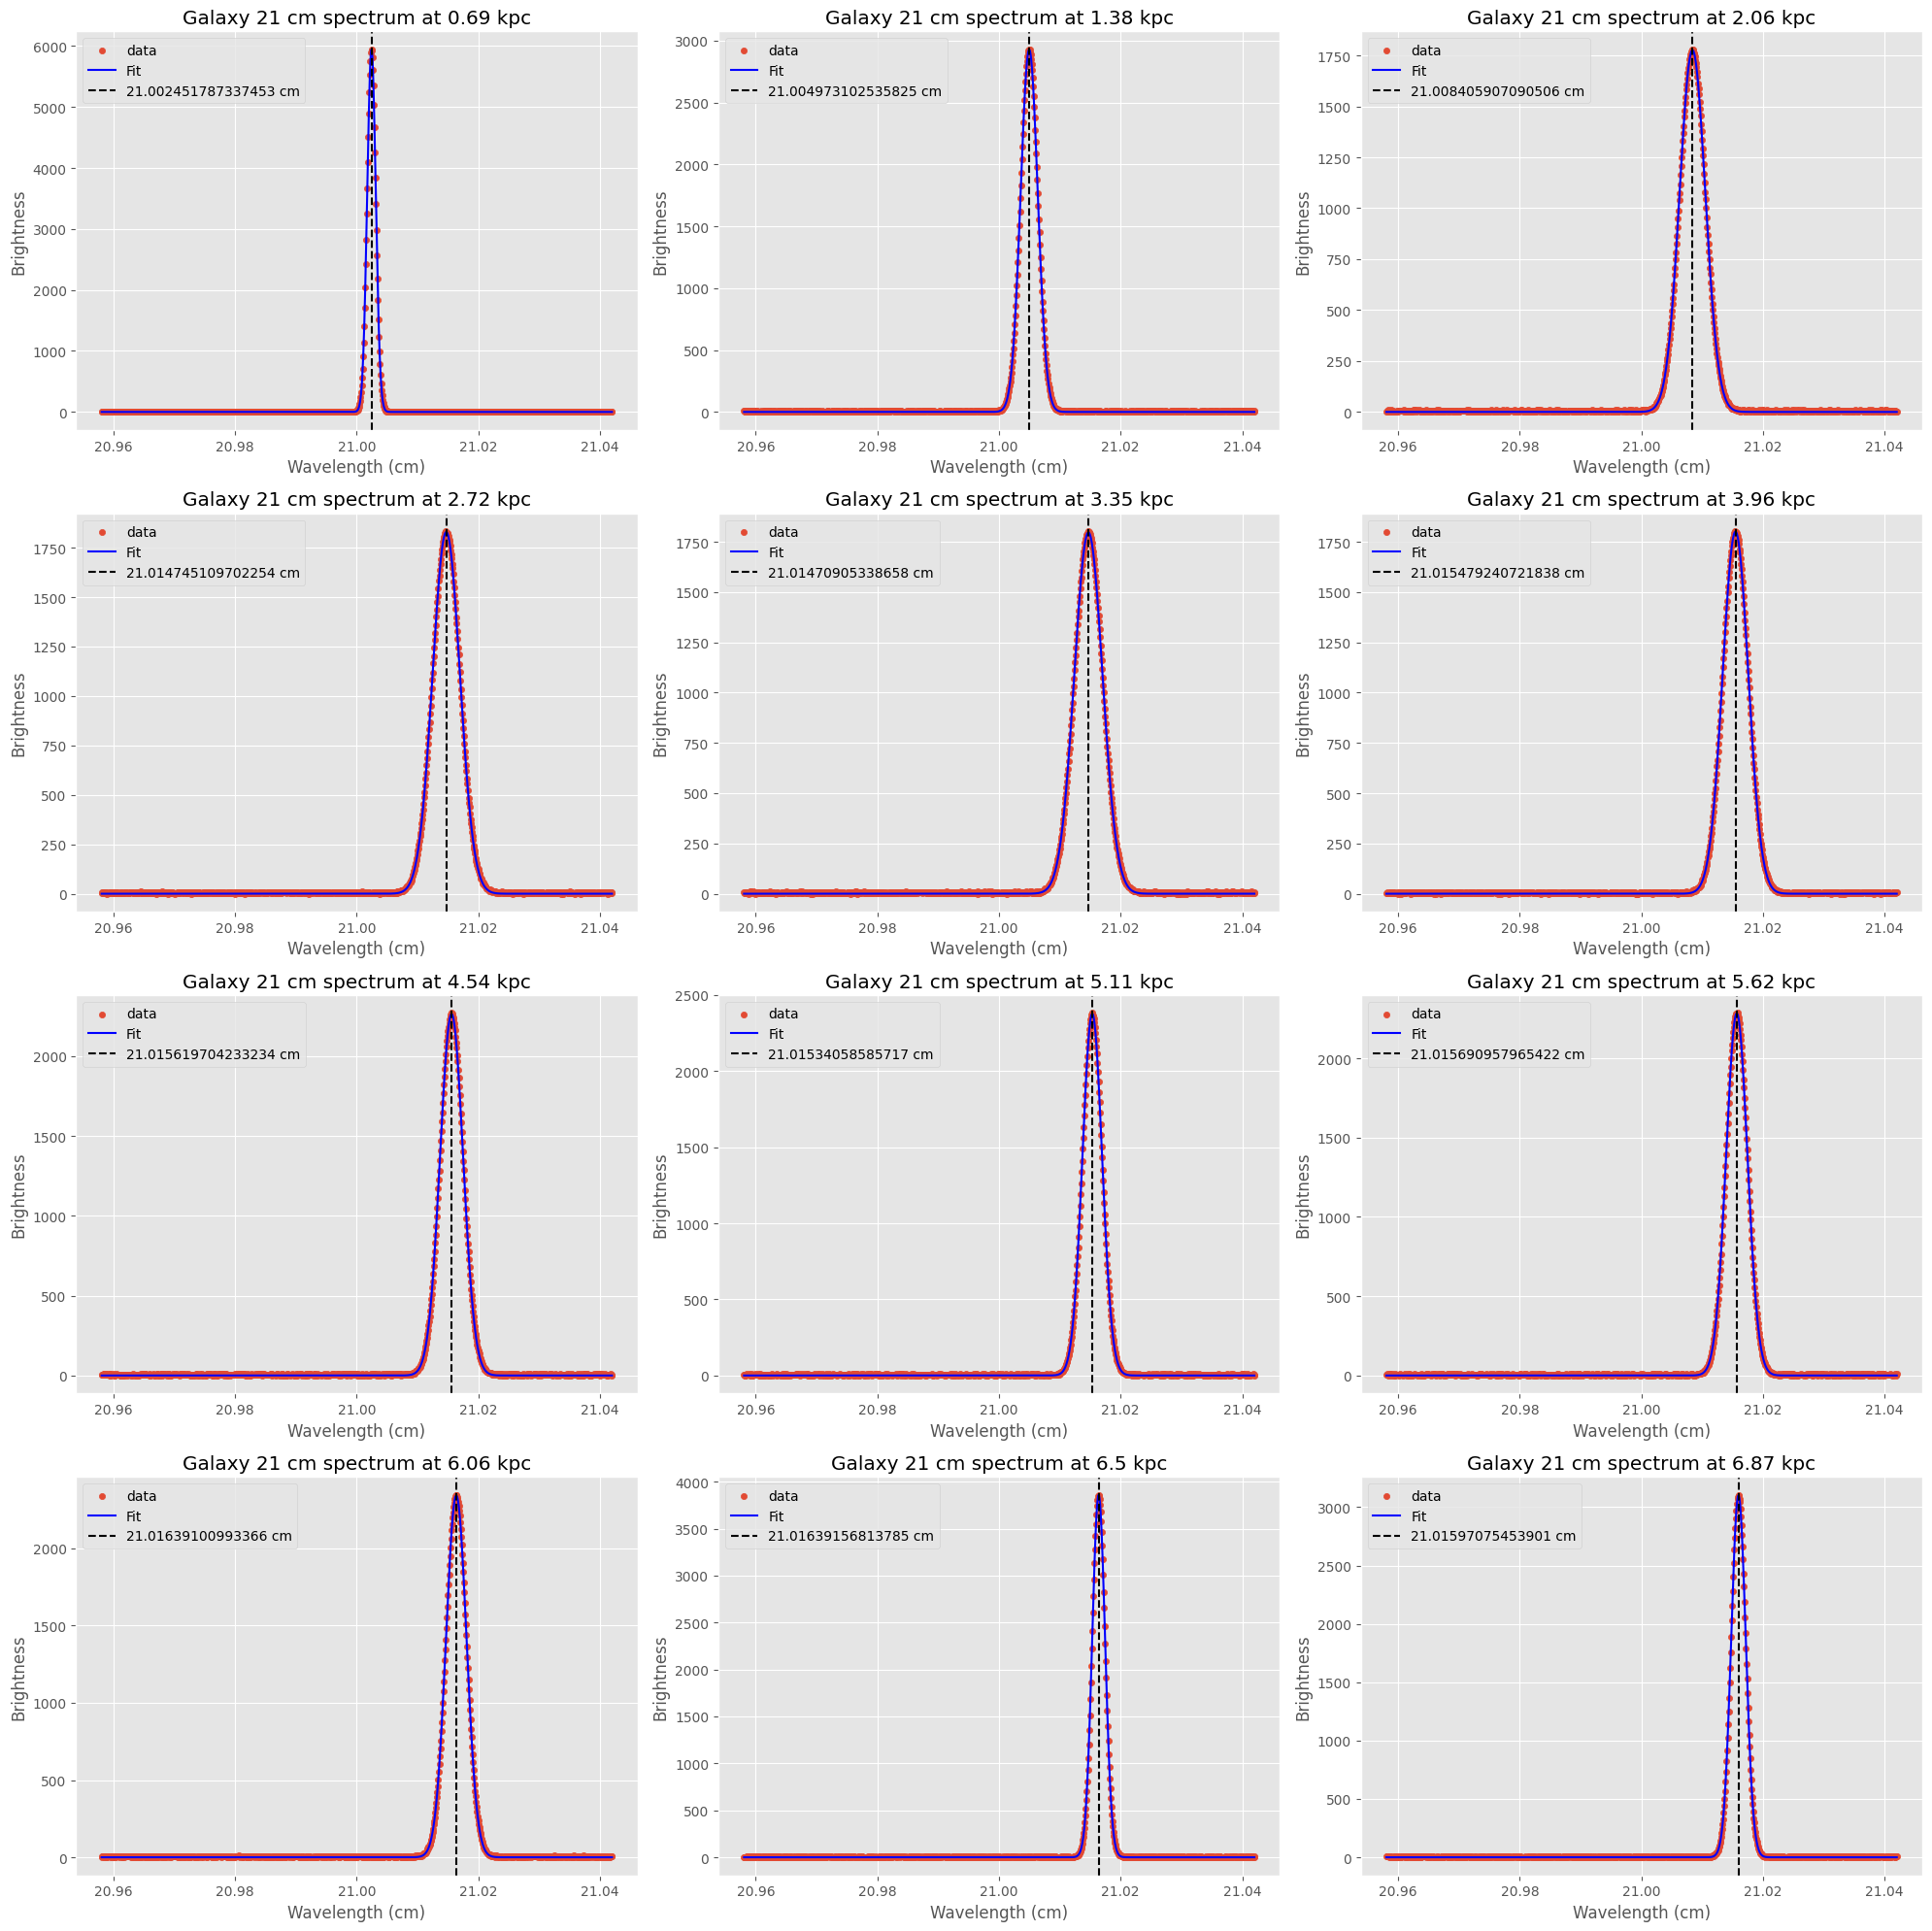

In [14]:
i = 0
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
ax = ax.flatten()
peak_wv = []
for spectrum, distance in zip(spectrum_list, dist):
    x, y = get_x_y(spectrum)
    peak_wv.append(x[np.where(y == max(y))])
    plotter(x, y, ax, i, f'Galaxy 21 cm spectrum at {distance} kpc')
    i += 1

plt.tight_layout()
plt.show()

In [15]:
peak_wv = np.array(peak_wv) #cm
rest_wv = 21    #cm
c = float(const.c.value)    #m/s
v = c * (peak_wv - rest_wv)/rest_wv     # velocity in m/s


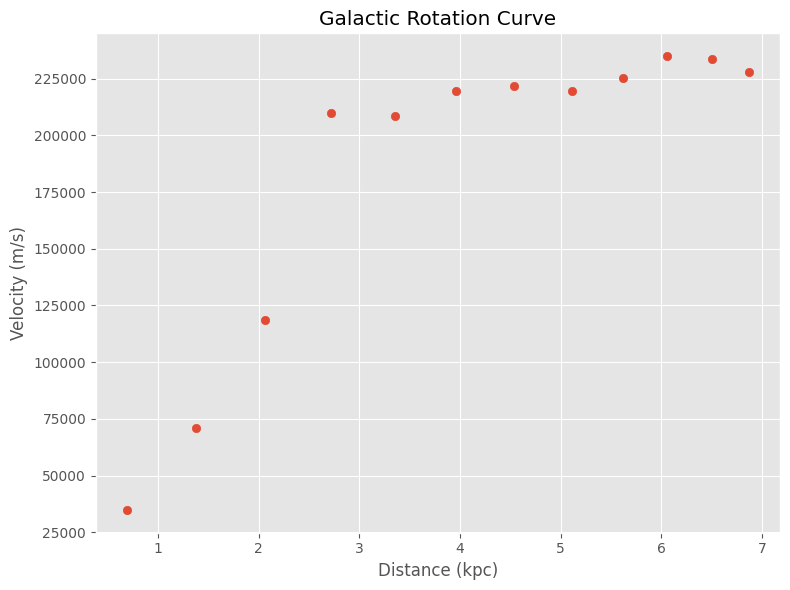

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(dist, v)
plt.xlabel('Distance (kpc)')
plt.ylabel('Velocity (m/s)')
plt.title('Galactic Rotation Curve')
plt.tight_layout()
plt.show()